# PMF: optimization surfaces visualizations 

The notebook plots 1D and 2D projections of optimization space for the problem of matching Poisson Matrix Factorization (PMF) prior predicitve distribution variance (minimization of the discrepancy=(Variance-100)^2 ). 
We consider two parametrizations: abcd vs mu-sgima. 

# Setup

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from aux_plt import *

from boplotting import plot_df
from boplotting import visualization_gpyopt as visualization
from boplotting import plot_bo_gpyopt as plot_bo

In [3]:
import numpy as np
from pmf_model import create_moments_estimator


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [4]:
theoretical_moments = create_moments_estimator(K=25, ESTIMATOR_NO=-1, N=1, M=1)

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Mu-sigma

In [5]:
def inverse_transform(a,b,c,d):    
    return a/b,np.sqrt(a)/b,c/d,np.sqrt(c)/d


def transform(mut,sigmat,mub,sigmab):    
    a,b = (mut*mut)/(sigmat*sigmat), mut/(sigmat*sigmat)
    c,d = (mub*mub)/(sigmab*sigmab), mub/(sigmab*sigmab)
    return a,b,c,d


def evaluate_f0_exact(mut,sigmat,mub,sigmab):
    a,b,c,d = transform(mut,sigmat,mub,sigmab)
    
    e, v = theoretical_moments(a,b,c,d)
    obj = (v-100.0)**2     
    return obj 

In [6]:
# Where to slice
DEFAULT_X_POSITION =  [0.16, 0.4, 0.4,0.4] 
DEFAULT_X_POSITION = np.round(inverse_transform(*DEFAULT_X_POSITION),8)
print("DEFAULT_X_POSITION=", DEFAULT_X_POSITION)
print(" transformation errors:", transform(*inverse_transform(*DEFAULT_X_POSITION))-DEFAULT_X_POSITION )

DEFAULT_X_POSITION= [0.4        1.         1.         1.58113883]
 transformation errors: [5.55111512e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [7]:
SEARCHED_VALS = sorted(set( list(np.arange(0.0, 4.01, 0.05))))
SEARCHED_VALS_a = SEARCHED_VALS
SEARCHED_VALS_b = SEARCHED_VALS
SEARCHED_VALS_c = SEARCHED_VALS
SEARCHED_VALS_d = sorted(set( list(np.arange(0.0, 4.01, 0.05))))

def precompute_surface(evaluate_f): # precompute over range of values of a,b,c,d
    results = []
    for i, a in enumerate(SEARCHED_VALS_a):
        if i%(len(SEARCHED_VALS_a)//10+1)==0: print("computing surface: %i/%i" % (i, len(SEARCHED_VALS)))  
        for b in SEARCHED_VALS_b:
            for c in SEARCHED_VALS_c:
                for d in SEARCHED_VALS_d:
                    results.append( (a, b, c, d, evaluate_f(a,b,c,d)) )    
    return pd.DataFrame(results).rename(columns={0: "mut", 1: "sigmat", 2: "mub", 3: "sigmab", 4: "obj"})

df0 = precompute_surface(evaluate_f0_exact)

computing surface: 0/81


  
  import sys
  mb, sb = cb/rb, np.sqrt(cb) / rb
  import sys
  mt, st = ct/rt, np.sqrt(ct) / rt
  


computing surface: 9/81
computing surface: 18/81
computing surface: 27/81
computing surface: 36/81
computing surface: 45/81
computing surface: 54/81
computing surface: 63/81
computing surface: 72/81


In [8]:
df_ms = df0

## Plotting

In [9]:
df0 = df_ms

In [10]:
# Which slices to plot

FEATURES = [v for v in df0.columns[:-1]]
import itertools
SLICES1D = FEATURES
SLICES2D = list( itertools.combinations(SLICES1D, 2) )

In [11]:
# Where to store results and how to label them

PREFIX = "RESULTS/surfaces/vis_V100_"
LABEL = r"$(\mathbb{V}[Y]-100)^2$"

RELABEL = { "mut": r"$\mu_\theta$", 
            "sigmat": r"$\sigma_\theta$", 
            "mub": r"$\mu_\beta$",
            "sigmab": r"$\sigma_\beta$"}

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")
  (prop.get_family(), self.defaultFamily[fontext]))
  (prop.get_family(), self.defaultFamily[fontext]))


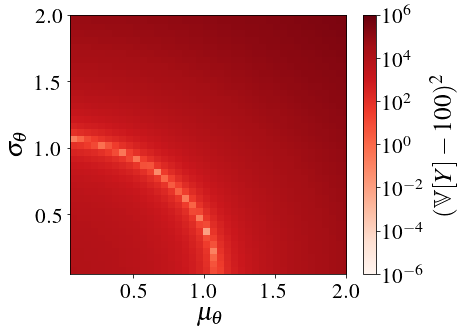

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


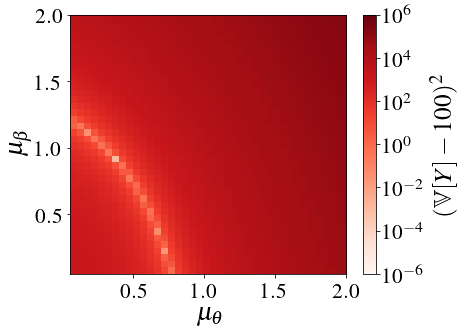

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


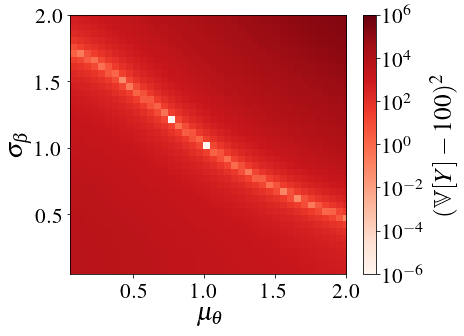

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


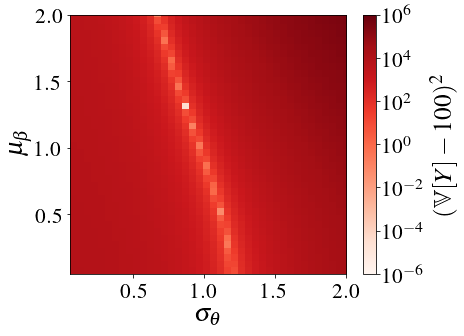

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


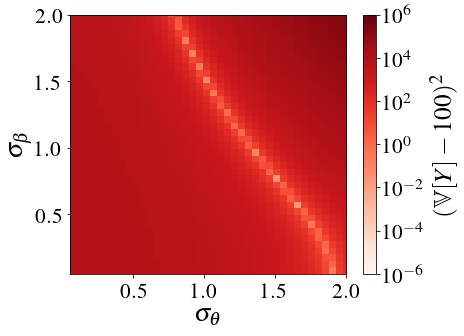

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


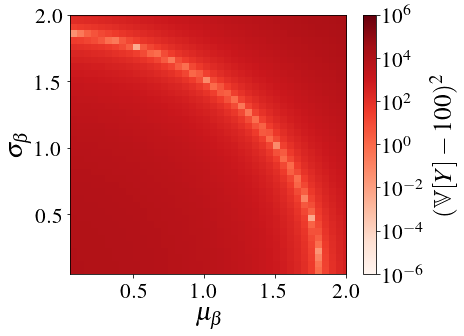

In [12]:
x_features = FEATURES
for plt_feature1, plt_feature2 in SLICES2D:
  start_plotting(cmbright=False)  
  plot_df.slice_and_plot_df2D(df0, plt_feature1, plt_feature2, 
                              DEFAULT_X_POSITION, x_features, cmap="Reds", kind="grid", 
                              numxticks=10, numyticks=15, vmax=1e6, norm="log", vmin=1e-6,
                              label=LABEL)
  plt.xlabel(RELABEL[plt.gca().get_xlabel()])
  plt.ylabel(RELABEL[plt.gca().get_ylabel()])
  #plt.title("df0 slice at=%s" % DEFAULT_X_POSITION); 
  #x1, x2 = plt.xlim(); plt.xlim(max(x1,0.05), x2)
  #y1, y2 = plt.ylim(); plt.ylim(max(y1,0.05), y2)
  plt.xlim(0.05,2); plt.ylim(0.05,2)
  plt.subplots_adjust(left=0.15, right=0.9, top=0.95, bottom=0.2)
  plt.savefig(PREFIX+"%s_%s.pdf" % (plt_feature1, plt_feature2))
  plt.show();

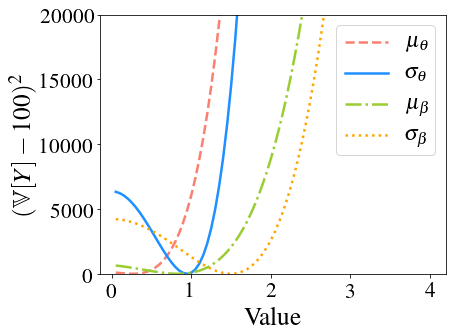

In [13]:
start_plotting(cmbright=False)
x_features = FEATURES
COLORS = ["salmon", "dodgerblue", "yellowgreen", "orange"]
LW = [2.5, 2.5, 2.5, 2.5]
LS = ["--", "-", "-.", "dotted"]
for i, plt_feature in enumerate(SLICES1D):
  plot_df.slice_and_plot_df1D(df0, plt_feature, DEFAULT_X_POSITION, x_features, 
                              color=COLORS[i], lw=LW[i], ls=LS[i], label=RELABEL[plt_feature]); 
#plt.yscale("log")  
#plt.ylim(1e-1,1e7)
plt.ylim(0,20000)
#plt.xlim(0,3)
plt.xlabel("Value")
plt.ylabel(LABEL)
plt.legend()
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)    
plt.savefig(PREFIX+"1Dmusigma.pdf")
plt.show();

# Abcd

In [14]:
def evaluate_f0_exact(a,b,c,d):
    e, v = theoretical_moments(a,b,c,d)
    obj = (v-100.0)**2 #+ (e-25.0)**2
    #print("evaluate_f0_exact a=%s b=%s c=%s d=%s => obj=%s" % (a,b,c,d, obj))
    return obj 

In [15]:
SEARCHED_VALS = sorted(set( list(np.arange(0.0, 4.001, 0.05))))
SEARCHED_VALS_a = SEARCHED_VALS
SEARCHED_VALS_b = SEARCHED_VALS
SEARCHED_VALS_c = SEARCHED_VALS
SEARCHED_VALS_d = SEARCHED_VALS

def precompute_surface(evaluate_f): # precompute over range of values of a,b,c,d
    results = []
    for i, a in enumerate(SEARCHED_VALS_a):
        if i%(len(SEARCHED_VALS_a)//10)==0: print("computing surface: %i/%i" % (i, len(SEARCHED_VALS)))  
        for b in SEARCHED_VALS_b:
            for c in SEARCHED_VALS_c:
                for d in SEARCHED_VALS_d:
                    results.append( (a, b, c, d, evaluate_f(a,b,c,d)) )    
    return pd.DataFrame(results).rename(columns={0: "a", 1: "b", 2: "c", 3: "d", 4: "obj"})

df0 = precompute_surface(evaluate_f0_exact)

computing surface: 0/81


  mt, st = ct/rt, np.sqrt(ct) / rt
  mb, sb = cb/rb, np.sqrt(cb) / rb
  mb, sb = cb/rb, np.sqrt(cb) / rb
  e, var = K * mt*mb, K * (mt*mb + (mb*st)**2 + (mt*sb)**2 + (st*sb)**2)  # theoretical
  mt, st = ct/rt, np.sqrt(ct) / rt


computing surface: 8/81
computing surface: 16/81
computing surface: 24/81
computing surface: 32/81
computing surface: 40/81
computing surface: 48/81
computing surface: 56/81
computing surface: 64/81
computing surface: 72/81
computing surface: 80/81


In [16]:
df_abcd = df0

## Plotting

In [17]:
df0 = df_abcd

In [18]:
# Which slices to plot

FEATURES = [v for v in df0.columns[:-1]]
DEFAULT_X_POSITION =  [0.16, 0.4, 0.4,0.4] 

import itertools
SLICES1D = FEATURES
SLICES2D = list( itertools.combinations(SLICES1D, 2) )

In [19]:
# Where to store results and how to label them

PREFIX = "RESULTS/surfaces/vis_V100_"
LABEL = r"$(\mathbb{V}[Y]-100)^2$"

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


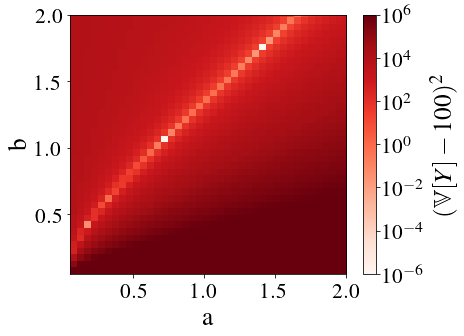

  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


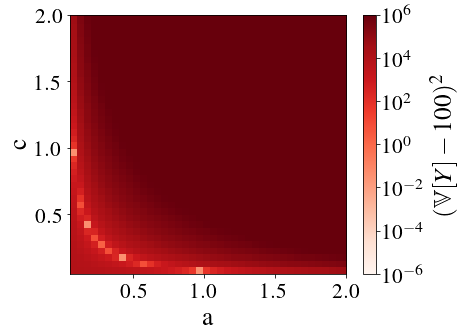

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


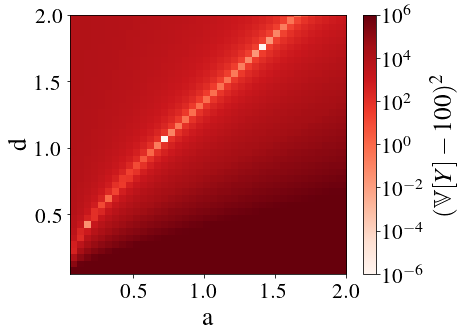

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


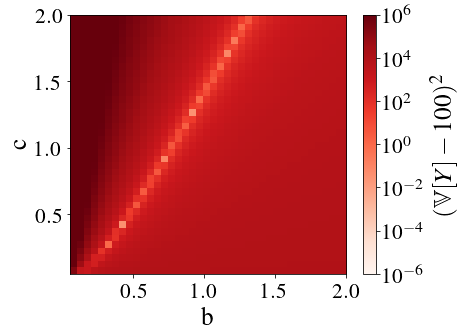

  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


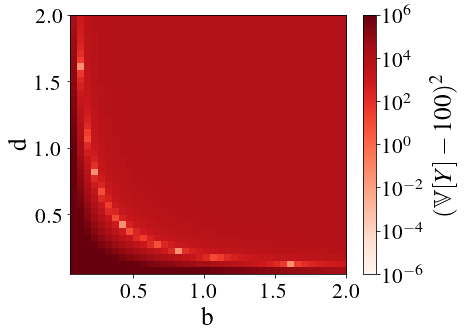

  if not vmin is None: g[g<vmin] = vmin
  if not vmax is None: g[g>vmax] = vmax
  if not h: warnings.warn("[plot_2D] Horizontal grid is non linear. Ticks' labels are incorrect!")
  if not v: warnings.warn("[plot_2D] Vertical grid is non linear. Ticks' labels are incorrect!")


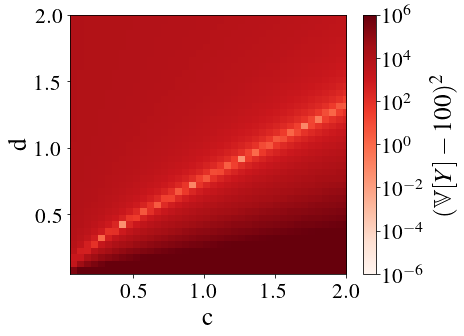

In [20]:
x_features = FEATURES
for plt_feature1, plt_feature2 in SLICES2D:
  start_plotting(cmbright=False)
  plot_df.slice_and_plot_df2D(df0, plt_feature1, plt_feature2, 
                              DEFAULT_X_POSITION, x_features, cmap="Reds", kind="grid", 
                              numxticks=10, numyticks=15, norm="log", vmin=1e-6, vmax=1e6, 
                              label=LABEL)
  #plt.title("df0 slice at=%s" % DEFAULT_X_POSITION); 
  #x1, x2 = plt.xlim(); plt.xlim(max(x1,0.05), x2)
  #y1, y2 = plt.ylim(); plt.ylim(max(y1,0.05), y2)
  plt.xlim(0.05,2); plt.ylim(0.05,2)
  plt.subplots_adjust(left=0.15, right=0.9, top=0.95, bottom=0.2)
  plt.savefig(PREFIX+"%s_%s.pdf" % (plt_feature1, plt_feature2))
  plt.show();

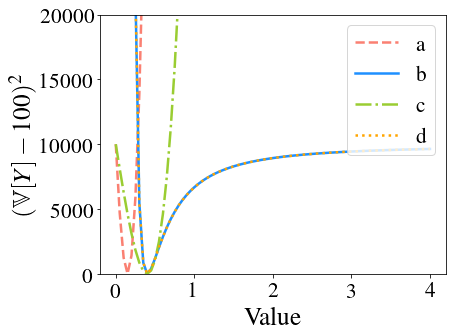

In [21]:
start_plotting(cmbright=False)
x_features = FEATURES
COLORS = ["salmon", "dodgerblue", "yellowgreen", "orange"]
LW = [2.5, 2.5, 2.5, 2.5]
LS = ["--", "-", "-.", "dotted"]
for i, plt_feature in enumerate(SLICES1D):
  plot_df.slice_and_plot_df1D(df0, plt_feature, DEFAULT_X_POSITION, x_features, 
                              color=COLORS[i], lw=LW[i], ls=LS[i], label=plt_feature); 
#plt.yscale("log")  
#plt.ylim(1e-1,1e7)
plt.ylim(0,20000)
#plt.xlim(0,4)

plt.xlabel("Value")
plt.ylabel(LABEL)
plt.legend(loc=1)
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)    
plt.savefig(PREFIX+"1D.pdf")
plt.show();

# Mu-sigma vs abcd

  (prop.get_family(), self.defaultFamily[fontext]))
  (prop.get_family(), self.defaultFamily[fontext]))
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 460.8x345.6 with 0 Axes>

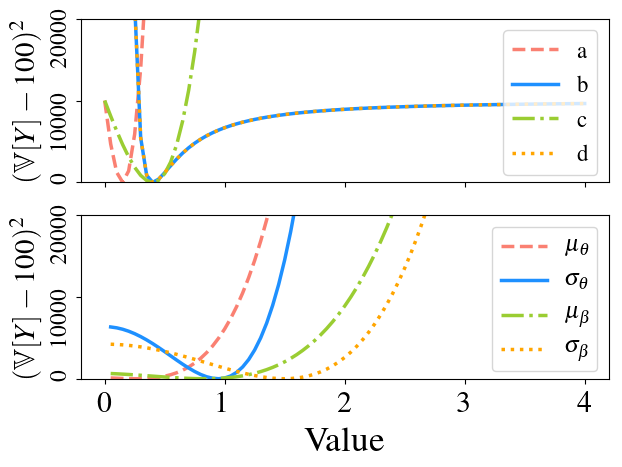

In [22]:
COLORS = ["salmon", "dodgerblue", "yellowgreen", "orange"]
LW = [2.5, 2.5, 2.5, 2.5]
LS = ["--", "-", "-.", "dotted"]

start_plotting(cmbright=False)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)

plt.sca(axs[0])                
for i, plt_feature in enumerate(["a", "b", "c", "d"]):
    plot_df.slice_and_plot_df1D(df_abcd, plt_feature,  
                              [0.16, 0.4, 0.4,0.4], ["a", "b", "c", "d"], 
                              color=COLORS[i], lw=LW[i], ls=LS[i], label=plt_feature); 
plt.ylim(0,20000)
plt.ylabel(LABEL, fontsize=21)
plt.legend(loc=1, fontsize=16.5)
plt.xlabel("")
plt.setp(plt.gca().get_yticklabels(), rotation='vertical', fontsize=17)

plt.sca(axs[1])                
for i, plt_feature in enumerate(["mut", "sigmat", "mub", "sigmab"]):
    plot_df.slice_and_plot_df1D(df_ms, plt_feature, 
                              np.round(inverse_transform(*[0.16, 0.4, 0.4,0.4] ),8), ["mut", "sigmat", "mub", "sigmab"], 
                              color=COLORS[i], lw=LW[i], ls=LS[i], label=RELABEL[plt_feature]); 
plt.ylim(0,20000)
plt.ylabel(LABEL, fontsize=21)
plt.legend(loc=1, fontsize=16.5)
plt.xlabel("Value")
plt.setp(plt.gca().get_yticklabels(), rotation='vertical', fontsize=17)

plt.subplots_adjust(left=0.125, right=0.95, top=0.95, bottom=0.2)    
plt.savefig(PREFIX+"1D_comparison.pdf")
plt.show();